Hi!

This project will be analyzing and performing data analysis on a dataset consisting of cars being used for rental.

The CSV includes 3000-5000 items.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Load CSV

In [7]:
file_path = 'https://github.com/ir89004/DS340-CarRental/raw/main/CarRentalData.csv'  # GitHub CSV location
data = pd.read_csv(file_path)

print("\nDataset Info:")
data.info()

print("First 5 rows of the dataset:")
data.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   int64  
 10  rate.daily          5851 non-null   int64  
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memor

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


## Data Cleaning and Preprocessing

### Handling missing values


In [8]:
data = data.dropna()

### Ensure correct data types

In [9]:
if 'Vehicle Year' in data.columns:
    data['Vehicle Year'] = data['Vehicle Year'].astype(int)
if 'Rental Price' in data.columns:
    data['Rental Price'] = data['Rental Price'].astype(float)

No columns need to be dropped

## Exploratory Data Analysis

### Car Make and Model Frequency

In [14]:
print("Car Makes and Models Frequency:")
data['vehicle.model'].value_counts()

Car Makes and Models Frequency:


,count
vehicle.model,
Model 3,299
Mustang,139
Model S,124
Wrangler,114
Model X,106
...,...
Venza,1
TT,1
IS,1


### Average Rental Prices by Fuel Type

In [15]:
data.groupby('fuelType')['rate.daily'].mean()

,rate.daily
fuelType,
DIESEL,91.426230
ELECTRIC,140.376098
GASOLINE,84.309107
HYBRID,84.359684


### Cities with High Demand for Electric Cars

In [26]:
if 'location.city' in data.columns and 'vehicle.make' in data.columns:
    print(data[data['vehicle.make'] == 'Tesla']['location.city'].value_counts())


location.city
Las Vegas          32
San Diego          31
Portland           16
Jersey City        11
Denver             11
                   ..
Oak Lawn            1
Dracut              1
Cutler Bay          1
South Milwaukee     1
Ewa Beach           1
Name: count, Length: 262, dtype: int64


### Visualizations

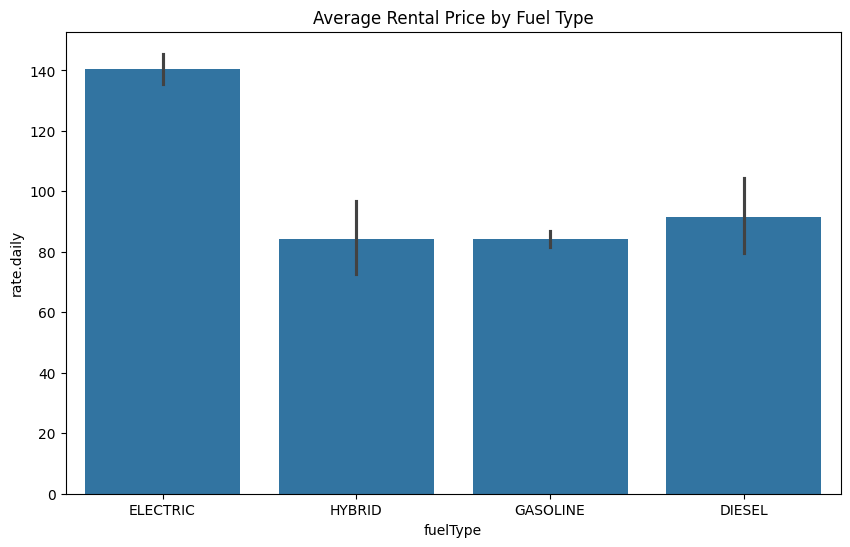

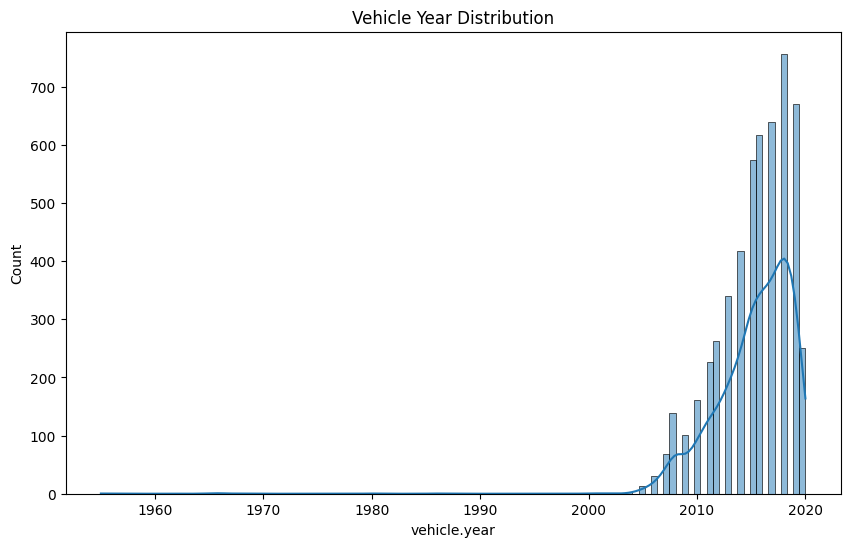

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['fuelType'], y=data['rate.daily'], estimator=np.mean)
plt.title("Average Rental Price by Fuel Type")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['vehicle.year'], kde=True)
plt.title("Vehicle Year Distribution")
plt.show()


## Advanced Analytics

Simple Linear Regression: Rental Price vs Vehicle Year

Regression Coefficients: [1.93504758]
Intercept: -3810.3277310823496
Mean Squared Error: 8813.519472861122
R^2 Score: -0.009368316467085247


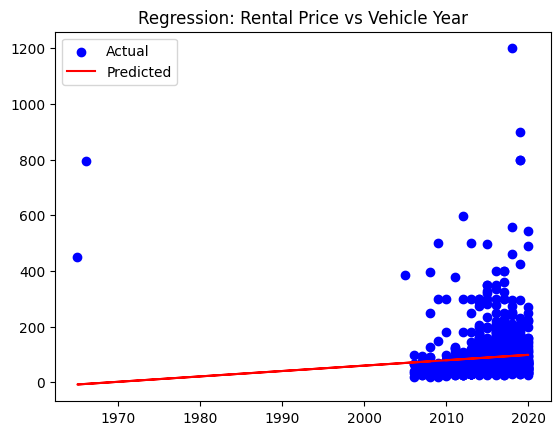

In [20]:
X = data[['vehicle.year']]
y = data['rate.daily']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title("Regression: Rental Price vs Vehicle Year")
plt.legend()
plt.show()

### Recommendations

### Popular Car Models to Stock

In [22]:
data['vehicle.model'].value_counts().head(5)

,count
vehicle.model,
Model 3,299
Mustang,139
Model S,124
Wrangler,114
Model X,106


### Pricing Strategies

In [23]:
data.groupby('fuelType')['rate.daily'].describe()

,count,mean,std,min,25%,50%,75%,max
fuelType,,,,,,,,
DIESEL,61.0,91.426230,49.170946,30.0,60.0,80.0,108.0,275.0
ELECTRIC,569.0,140.376098,61.878082,40.0,100.0,130.0,166.0,800.0
GASOLINE,4403.0,84.309107,87.175446,20.0,42.0,62.0,95.0,1500.0
HYBRID,253.0,84.359684,97.699780,23.0,36.0,47.0,68.0,600.0


### Marketing Strategies for Underutilized Vehicles

Underutilized models: vehicle.model
Venza                  1
TT                     1
IS                     1
Explorer Sport Trac    1
Cooper Coupe           1
Name: count, dtype: int64


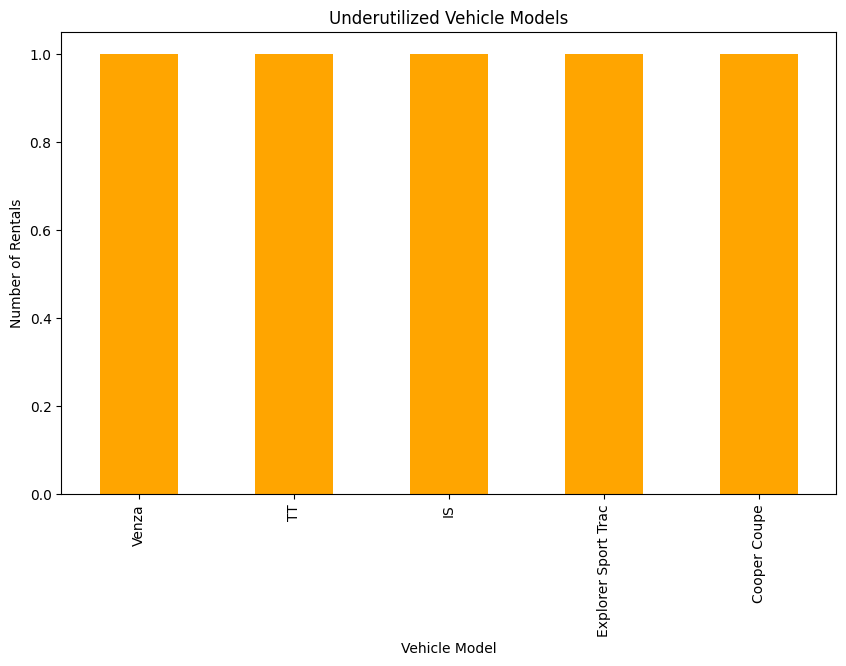

In [27]:
underutilized = data['vehicle.model'].value_counts().tail(5)
print("Underutilized models:", underutilized)

plt.figure(figsize=(10, 6))
underutilized.plot(kind='bar', color='orange')
plt.title("Underutilized Vehicle Models")
plt.xlabel("Vehicle Model")
plt.ylabel("Number of Rentals")
plt.show()
